Get Google Trends data of keywords such as 'diet' and 'gym' and see how they vary over time while learning about trends and seasonality in time series data.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import the data you downloaded with .read_csv() and print the first 5 rows:

In [2]:
file = 'Downloads/multiTimeline.csv'
df = pd.read_csv(file, skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,49
1,2004-02,77,27,49
2,2004-03,69,25,46
3,2004-04,72,23,48
4,2004-05,74,23,43


You can also use the .info() method to check out your data types, number of rows and more:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
Month                   170 non-null object
diet: (Worldwide)       170 non-null int64
gym: (Worldwide)        170 non-null int64
finance: (Worldwide)    170 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.7+ KB


## Wrangle Your Data

As a first step, we need to rename the columns of dataframe so that df doesn't have any whitespace in them.

In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,49
1,2004-02,77,27,49
2,2004-03,69,25,46
3,2004-04,72,23,48
4,2004-05,74,23,43


Next, you'll turn the 'month' column into a DateTime data type and make it the index of the DataFrame.

Note that you do this because you saw in the result of the .info() method that the 'Month' column was actually an of data type object. Now, that generic data type encapsulates everything from strings to integers, etc. That's not exactly what you want when you want to be looking at time series data. That's why you'll use .to_datetime() to convert the 'month' column in your DataFrame to a DateTime.

Be careful! Make sure to include the inplace argument when you're setting the index of the DataFrame df so that you actually alter the original index and set it to the 'month' column.

In [5]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,49
2004-02-01,77,27,49
2004-03-01,69,25,46
2004-04-01,72,23,48
2004-05-01,74,23,43


### A bit of Exploratory Data Analysis (EDA)

You can use a built-in pandas visualization method .plot() to plot your data as 3 line plots on a single figure (one for each column, namely, 'diet', 'gym', and 'finance').

Note that you can also specify some arguments to this method, such as figsize, linewidthand fontsize to set the figure size, line width and font size of the plot, respectively.

Additionally, you'll see that what you see on the x-axis is not the months, as the default label suggests, but the years. To make your plot a bit more accurate, you'll specify the label on the x-axis to 'Year' and also set the font size to 20.

Tip: if you want to suppress the Matplotlib output, just add a semicolon ; to your last line of code!

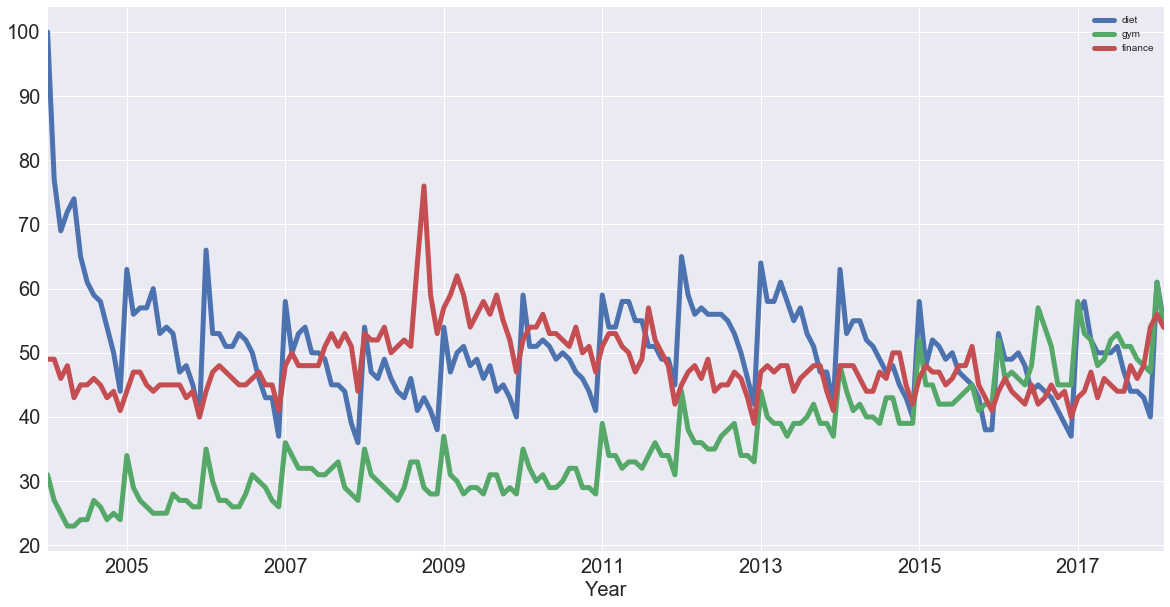

In [6]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

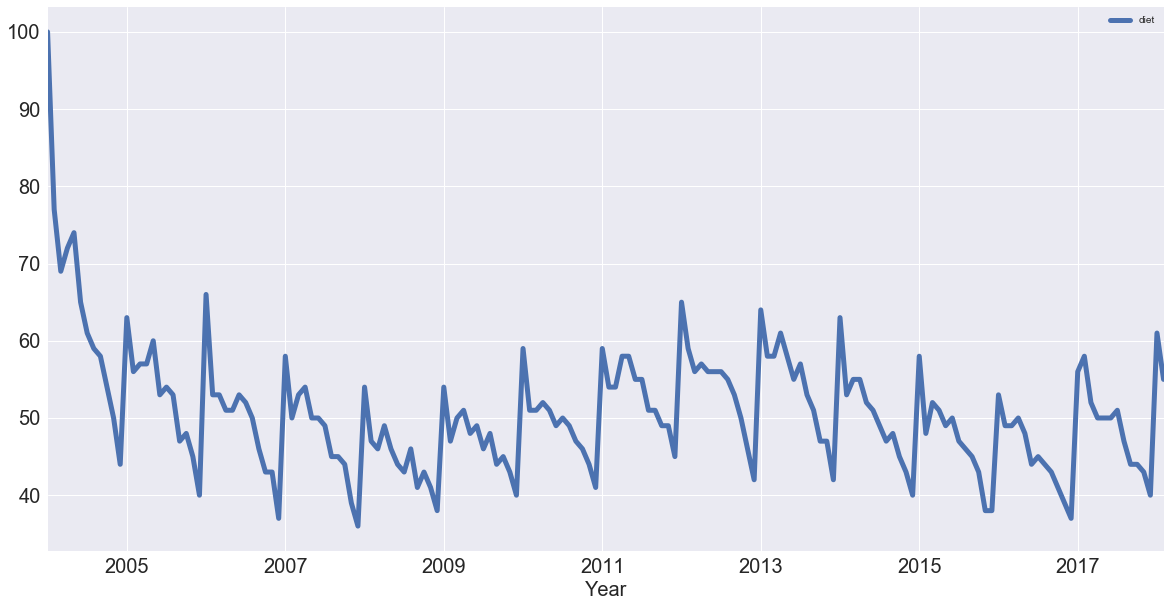

In [7]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Note: the first thing to notice is that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

With this in mind, you'll learn how to identify trends in your time series!

## Trends and Seasonality in Time Series Data

Identifying Trends in Time Series: 

There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens then because you take the average is it tends to smooth out noise and seasonality. You'll see an example of that right now. Check out this rolling average of 'diet' using the built-in pandas methods.

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.

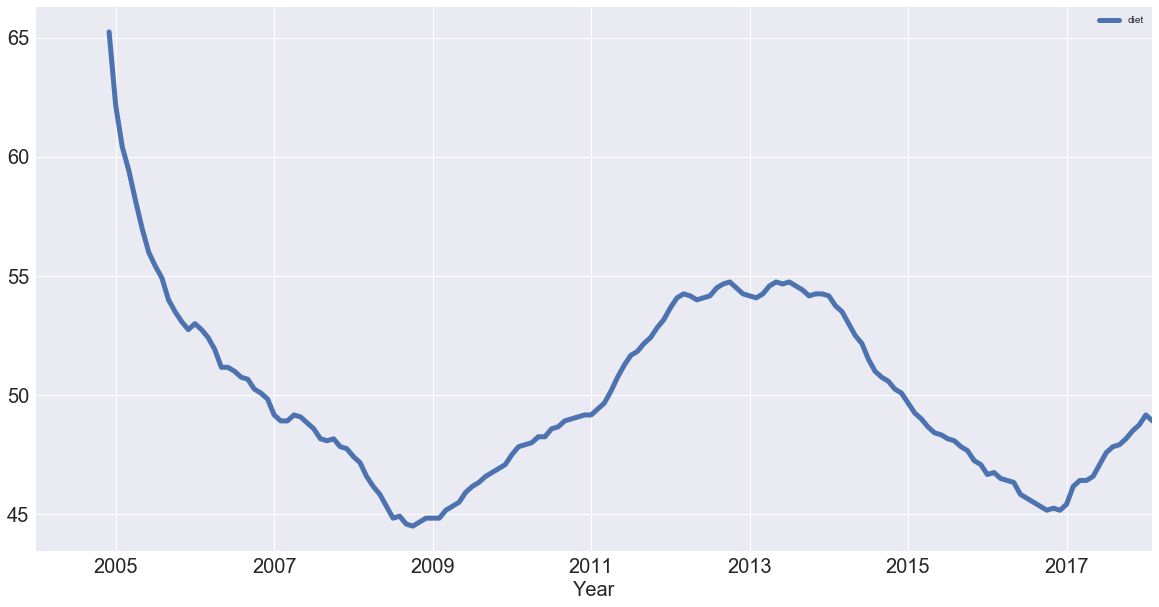

In [8]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Note that in the code chunk above you used two sets of squared brackets to extract the 'diet' column as a DataFrame; If you would have used one set, like df['diet'], you would have created a pandas Series.

In the code chunk above, you also chained methods: you called methods on an object one after another. Method chaining is pretty popular and pandas is one of the packages that really allows you to use that style of programming to the max!

Now you have the trend that you're looking for! You have removed most of the seasonality compared to the previous plot.

You can also plot the rolling average of 'gym' using built-in pandas methods with the same window size as you took for the 'diet' data:

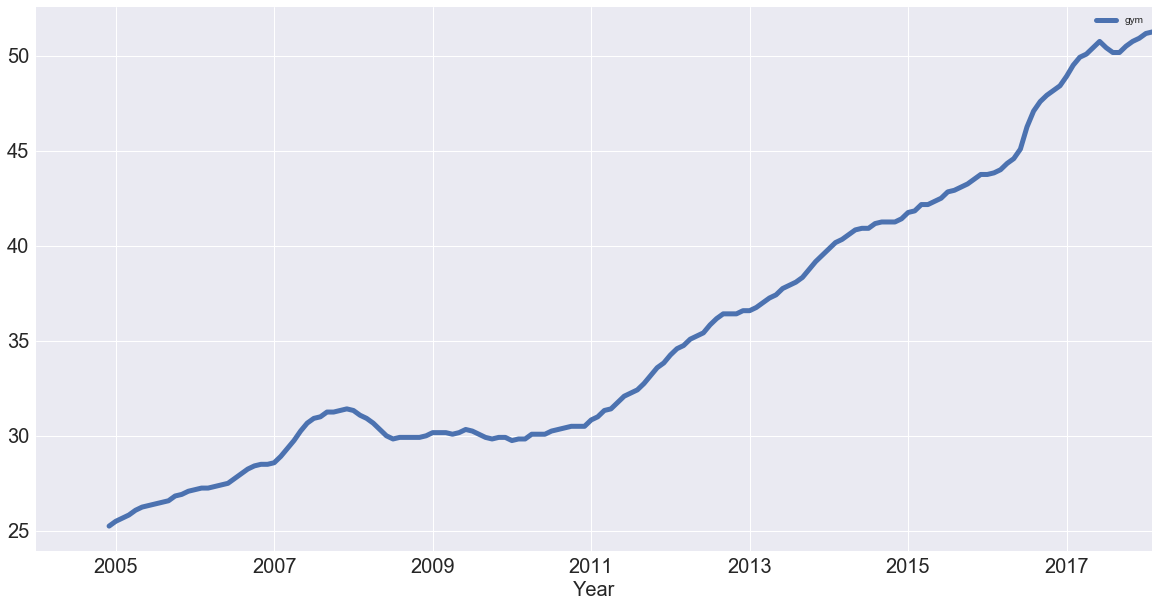

In [9]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

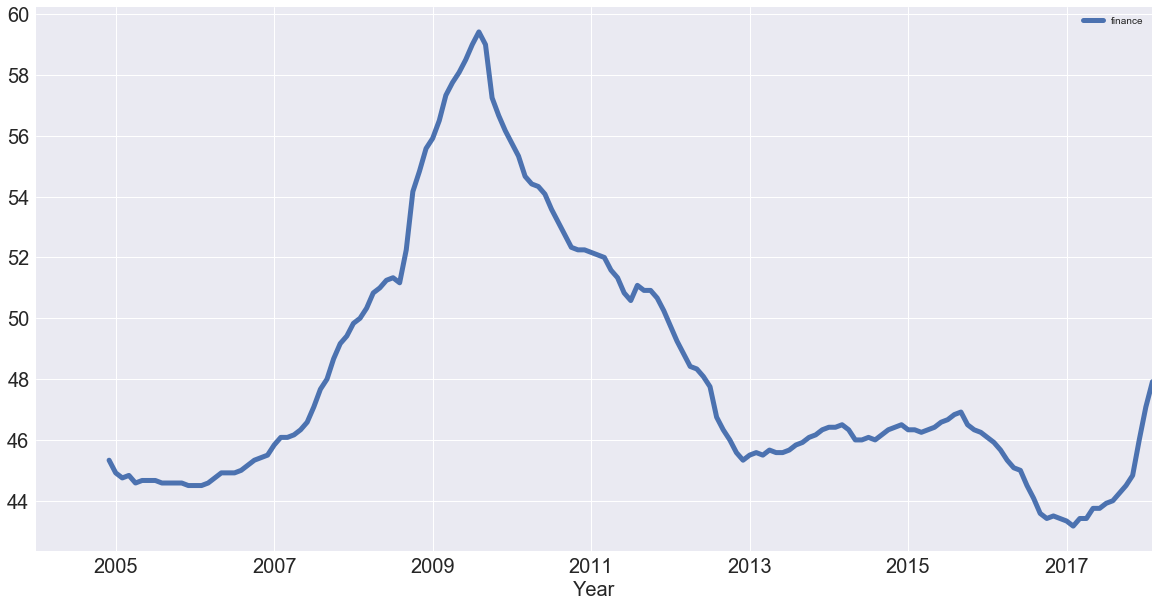

In [10]:
finance = df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You have successfully removed the seasonality and you see an upward trend for "gym"! But how do these two search terms compare?

You can figure this out by plotting the trends of 'gym' and 'diet' on a single figure:

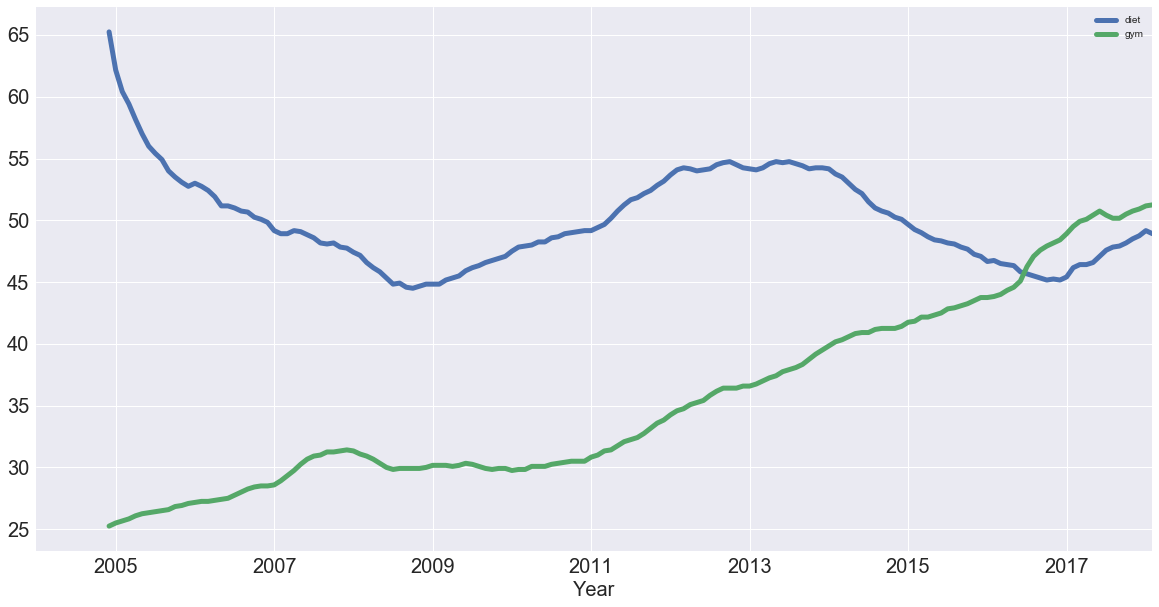

In [11]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You created a new DataFrame df_rm that has two columns with the rolling average of 'diet' and 'gym'. You used the pd.concat() function, which takes a list of the columns as a first argument and, since you want to concatenate them as columns, you also added the axis argument, which you set to 1.

Next, you plotted the DataFrame with the plot() method, just like you did before! So now, removing the seasonality, you see that diet potentially has some form of seasonality, whereas gym is actually increasing!

With the trends in the data identified, it's time to think about seasonality, which is the repetitive nature of your time series. As you saw in the beginning of this tutorial, it looked like there were trends and seasonal components to the time series of the data.

Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

First-order differencing
You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

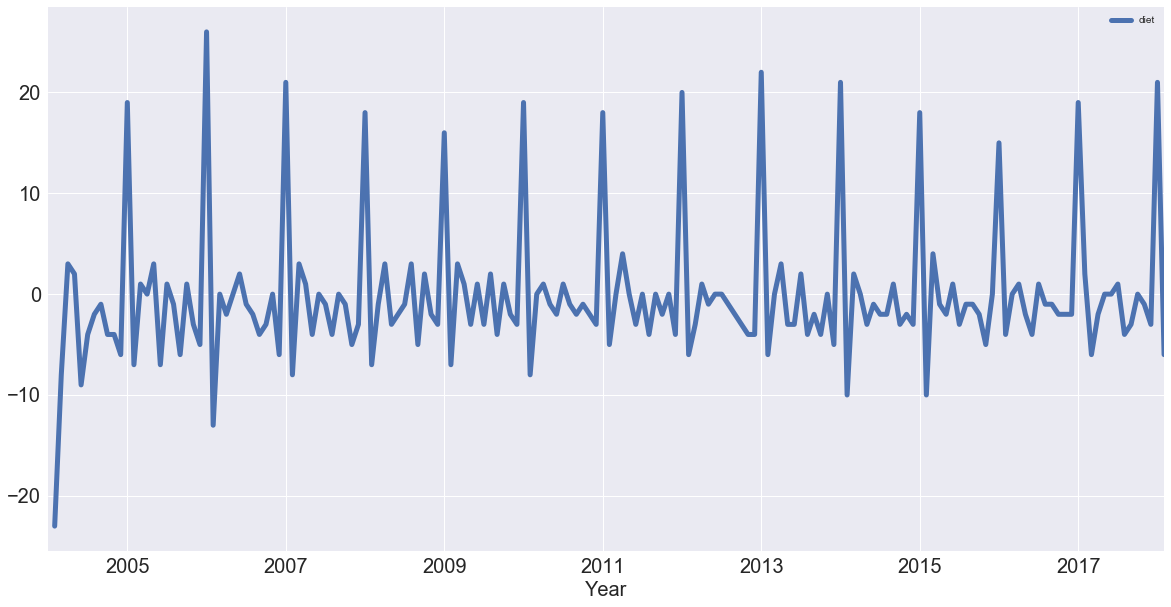

In [12]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [13]:
#Then, compute the correlation coefficients of all of these time series with the help of .corr():
df.corr()

,diet,gym,finance
diet,1.000000,-0.062333,-0.049054
gym,-0.062333,1.000000,-0.207310
finance,-0.049054,-0.207310,1.000000


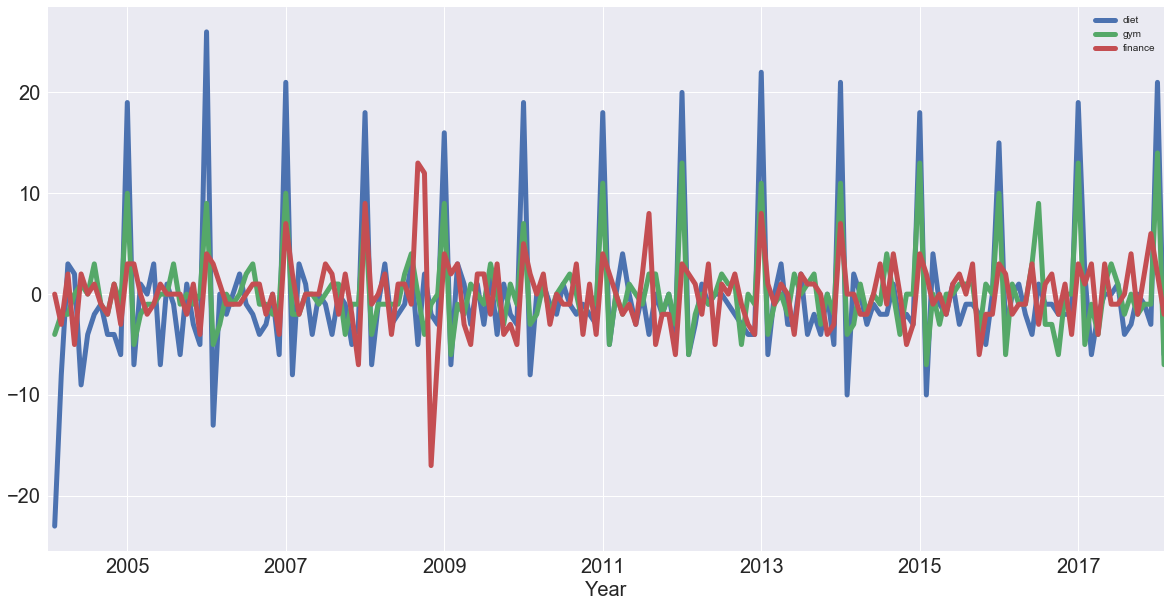

In [14]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

Note: you can also perform 2nd order differencing, which means that you would be looking at the difference between one data point and the two that precede it, if the trend is not yet entirely removed. See here for more on differencing.

Differencing is super helpful in turning your time series into a stationary time series. You won't get too much into these here but a stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

With all of this at hand, you'll now analyze your periodicity in your times series by looking at its autocorrelation function. But before that, you'll take a short detour into correlation.

Periodicity and Autocorrelation
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

You'll get to this in a minute.

First, let's remind yourself about correlation and take an intuitive approach to this concept!

In [15]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.799092,0.331395
gym,0.799092,1.000000,0.292239
finance,0.331395,0.292239,1.000000


Autocorrelation
Now you've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

Here, you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

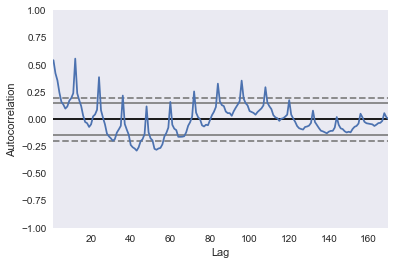

In [16]:
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

Of course, you have a correlation of itself with itself at a lag of 0.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!